In [ ]:
# Project #1356
# Paper Name : PubMed 200k RCT
# Method : Replication
# Library : scikit-learn
# Model : Naive Bayes

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 9.02 MiB/s, done.


In [ ]:
import os
import pandas

In [ ]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"
filenames = [data_dir+filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtrain.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signdev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtest.txt']

In [ ]:
# Preprocess data
def get_lines(filename):
  """
  reads the filenames and returns the lines of text as a list
  """
  with open(filename,'r') as f:
    return f.readlines()


In [ ]:
# Let's read in the training lines
train_lines = get_lines(data_dir+"/train.txt")


In [ ]:
def preprocess_text_with_line_numbeeers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_lines in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_lines.split("\t")
        line_data["target"]=target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line_numbeeers(data_dir+"/train.txt")
validation_samples = preprocess_text_with_line_numbeeers(data_dir+"/dev.txt")
test_samples = preprocess_text_with_line_numbeeers(data_dir+"/test.txt")
len(train_samples),len(validation_samples),len(test_samples)

(180040, 30212, 30135)

In [ ]:
train_df = pandas.DataFrame(train_samples)
val_df = pandas.DataFrame(validation_samples)
test_df = pandas.DataFrame(test_samples)

<Axes: >

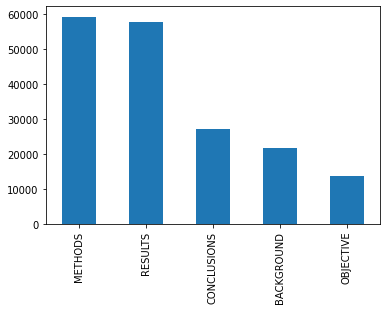

In [ ]:
# distribtution of labels
train_df.target.value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

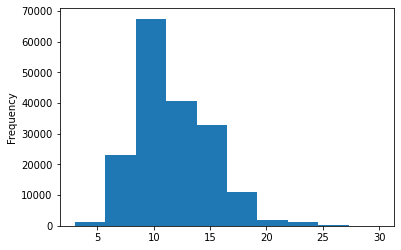

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_sentences = train_df['text'].to_list()
val_sentences = val_df['text'].to_list()
test_sentences = test_df['text'].to_list()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_df['target'].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df['target'].to_numpy())

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([("tf-idf", TfidfVectorizer()),("clf", MultinomialNB())])

In [ ]:
model_0.fit(X=train_sentences,
             y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869